# Preprocessing

---
## Imports

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import sys
sys.path.append('../')

from utils.duplicates import remove_rows, get_duplicates_to_delete, visualize_duplicates
from utils.rescale_image import resize_images_in_dataframe, display_random_images
from utils.normalization import process_images, insert_normalized_images
from utils.encoding import one_hot_encode, label_encode
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('../data/processed/csv/df.csv')
duplicates = pd.read_csv('../data/processed/csv/duplicates.csv')

--- 
## Remove duplicates

2 DataFrames will be outputted:

| Variables   | Description                                                       |
|-------------|-------------------------------------------------------------------|
| `df_no_dup` | DataFrame with all but one duplicates of each style removed       |
| `df_no_ins` | DataFrame with misclassified images manually reviewed and removed |

### Automatically delete:
- For each duplicate group, delete all but one rows marked as "Duplicate" for each "Style".
- Outputs "df_no_dup".

In [11]:
duplicates_to_delete = get_duplicates_to_delete(duplicates)
df_no_dup = remove_rows(df, duplicates_to_delete)
df_no_dup

Identifying rows to delete...


100%|██████████| 5684/5684 [00:07<00:00, 811.70it/s]

Removing rows...


,Path,Type,Width,Height,Ratio,Mode,Class,Style
0,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,beds,Asian
1,beds/Asian/20109asian-panel-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
2,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
3,beds/Asian/20750asian-comforters-and-comforter...,jpg,350,350,1.0,RGB,beds,Asian
4,beds/Asian/20802asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
...,...,...,...,...,...,...,...,...
84790,tables/Victorian/5victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian
84791,tables/Victorian/6victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian
84792,tables/Victorian/7victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian
84793,tables/Victorian/8victorian-dining-tables.jpg,jpg,350,350,1.0,RGB,tables,Victorian


### Manually delete:
- Any rows marked as "Inspect" that belongs in the wrong "Class".
- Outputs "df_no_ins"

In [12]:
inspects = duplicates[duplicates['Duplicate_Type'] == 'Inspect']
inspects

,Group,Duplicate_Type,Path,Type,Width,Height,Ratio,Mode,Class,Style,Hash
117,59,Inspect,tables/Craftsman/28467craftsman-dressers.jpg,jpg,350,350,1.0,RGB,tables,Craftsman,fbea6ebbd105a451cd78b1ccae23cb8492f195ae1d2312...
118,59,Inspect,beds/Craftsman/4866craftsman-bed.jpg,jpg,350,350,1.0,RGB,beds,Craftsman,fbea6ebbd105a451cd78b1ccae23cb8492f195ae1d2312...
289,145,Inspect,chairs/Contemporary/1181contemporary-indoor-ch...,jpg,350,350,1.0,RGB,chairs,Contemporary,eaef9014e0503bfd81510ba385fa3f419faae0429ea4c7...
290,145,Inspect,sofas/Contemporary/2852contemporary-sofas.jpg,jpg,350,350,1.0,RGB,sofas,Contemporary,eaef9014e0503bfd81510ba385fa3f419faae0429ea4c7...
297,149,Inspect,sofas/Contemporary/409contemporary-sofas.jpg,jpg,350,350,1.0,RGB,sofas,Contemporary,aabf7f10b544686ec442c1bb390b906f42fe6a7e913d90...
298,149,Inspect,chairs/Contemporary/1446contemporary-indoor-ch...,jpg,350,350,1.0,RGB,chairs,Contemporary,aabf7f10b544686ec442c1bb390b906f42fe6a7e913d90...
415,205,Inspect,chairs/Contemporary/870contemporary-indoor-cha...,jpg,350,350,1.0,RGB,chairs,Contemporary,eafeb034e0503af5815123e195eb27439faac54ade84c7...
416,205,Inspect,sofas/Contemporary/1293contemporary-sofas.jpg,jpg,350,350,1.0,RGB,sofas,Contemporary,eafeb034e0503af5815123e195eb27439faac54ade84c7...
445,220,Inspect,chairs/Eclectic/5037eclectic-armchairs-and-acc...,jpg,350,350,1.0,RGB,chairs,Eclectic,ebfa3fb59050e02fc047c84a64adcdc8e48c92ff8f20c3...
446,220,Inspect,sofas/Transitional/4509transitional-sofas.jpg,jpg,350,350,1.0,RGB,sofas,Transitional,ebfa3fb59050e02fc047c84a64adcdc8e48c92ff8f20c3...


In [13]:
total_inspect_groups = inspects["Group"].nunique(dropna=False)

In [14]:
inspects_rows_to_delete = [91, 154, 205, 227, 235, 277, 280, 281, 287, 290, 299, 310, 318, 323, 325]

In [17]:
inspect_review = inspects.copy()
inspect_review["Duplicate_Type"] = "Keep"
inspect_review.loc[inspects_rows_to_delete, "Duplicate_Type"] = "DELETE"

KeyError: '[91, 154, 205, 227, 235, 277, 280, 281, 287, 299, 310, 318, 323, 325] not in index'

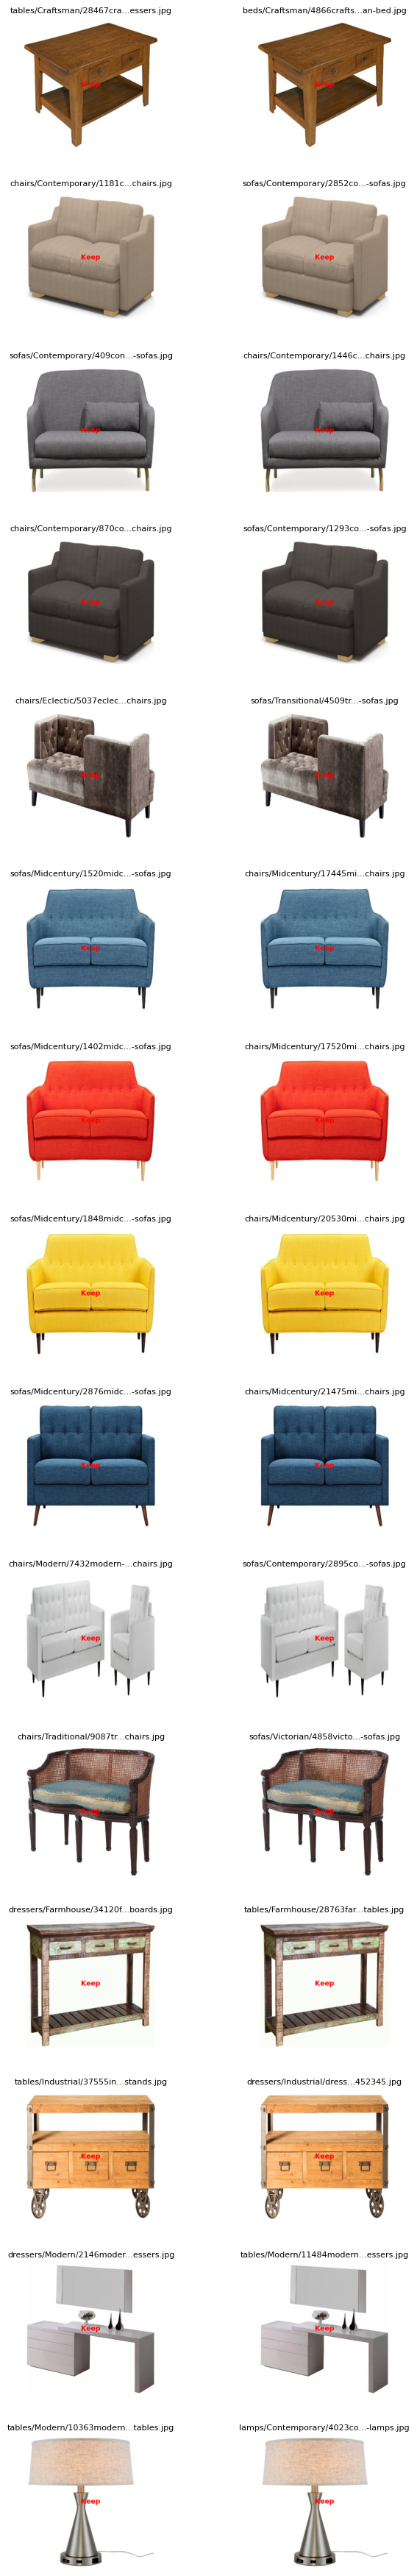

In [18]:
visualize_duplicates(inspect_review, total_inspect_groups)

In [19]:
inspects_to_delete = inspect_review[inspect_review["Duplicate_Type"] == "DELETE"]
inspects_to_delete

,Group,Duplicate_Type,Path,Type,Width,Height,Ratio,Mode,Class,Style,Hash


In [20]:
df_no_ins = remove_rows(df, inspects_to_delete)
df_no_ins

Removing rows...


,Path,Type,Width,Height,Ratio,Mode,Class,Style
0,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,beds,Asian
1,beds/Asian/20027asian-canopy-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
2,beds/Asian/20109asian-panel-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
3,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
4,beds/Asian/20750asian-comforters-and-comforter...,jpg,350,350,1.0,RGB,beds,Asian
...,...,...,...,...,...,...,...,...
90078,tables/Victorian/5victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian
90079,tables/Victorian/6victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian
90080,tables/Victorian/7victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian
90081,tables/Victorian/8victorian-dining-tables.jpg,jpg,350,350,1.0,RGB,tables,Victorian


---
## Split (train, validation, test)

This part is complicated since there are 2 starting DataFrames (duplicates cleaned / inspects cleaned), and 2 target classes (Class / Style). 
Please refer to this table for the variables after splitting.

#### Duplicates cleaned
| Train                  | Validation           | Test                  | Description   |
|------------------------|----------------------|-----------------------|---------------|
| `no_dup_train_X`       | `no_dup_val_X`       | `no_dup_test_X`       | Data features |
| `no_dup_train_Y_class` | `no_dup_val_Y_class` | `no_dup_test_Y_class` | Target class  |
| `no_dup_train_Y_style` | `no_dup_val_Y_style` | `no_dup_test_Y_style` | Target style  |

#### Manual inspection cleaned
| Train                  | Validation           | Test                  | Description   |
|------------------------|----------------------|-----------------------|---------------|
| `no_ins_train_X`       | `no_ins_val_X`       | `no_ins_test_X`       | Data features |
| `no_ins_train_Y_class` | `no_ins_val_Y_class` | `no_ins_test_Y_class` | Target class  |
| `no_ins_train_Y_style` | `no_ins_val_Y_style` | `no_ins_test_Y_style` | Target style  |


### Prepare target and training

In [21]:
# df_no_dup
df_no_dup_target_class = df_no_dup[["Class"]].copy()
df_no_dup_target_style = df_no_dup[["Style"]].copy()

# df_no_ins
df_no_ins_target_class = df_no_ins[["Class"]].copy()
df_no_ins_target_style = df_no_ins[["Style"]].copy()

In [22]:
# Currently dropping all but "Path", since the values of all the other columns ("Type", "Width", "Height"...) is the same
columns_to_keep = ["Path"] # Change later if needed
columns_to_drop = [col for col in df.columns if col not in columns_to_keep]

df_no_dup_train = df_no_dup.drop(columns=columns_to_drop, axis=1)
df_no_ins_train = df_no_ins.drop(columns=columns_to_drop, axis=1)

### Splitting

In [23]:
# df_no_dup
no_dup_train_X, no_dup_test_X, no_dup_train_Y_class, no_dup_test_Y_class, no_dup_train_Y_style, no_dup_test_Y_style = train_test_split(
    df_no_dup_train,
    df_no_dup_target_class,
    df_no_dup_target_style,
    test_size=0.2,
    random_state=42
)
no_dup_train_X, no_dup_val_X, no_dup_train_Y_class, no_dup_val_Y_class, no_dup_train_Y_style, no_dup_val_Y_style = train_test_split(
    no_dup_train_X,
    no_dup_train_Y_class,
    no_dup_train_Y_style,
    test_size=0.25,
    random_state=42
)

# df_no_ins
no_ins_train_X, no_ins_test_X, no_ins_train_Y_class, no_ins_test_Y_class, no_ins_train_Y_style, no_ins_test_Y_style = train_test_split(
    df_no_ins_train,
    df_no_ins_target_class,
    df_no_ins_target_style,
    test_size=0.2,
    random_state=42
)
no_ins_train_X, no_ins_val_X, no_ins_train_Y_class, no_ins_val_Y_class, no_ins_train_Y_style, no_ins_val_Y_style = train_test_split(
    no_ins_train_X,
    no_ins_train_Y_class,
    no_ins_train_Y_style,
    test_size=0.25,
    random_state=42
)

Note: please refer to the tables under "Split (train, validation, test)" for easier understanding

---
## Rescaling

Note: Proceed the rescaling only with data features since the target dataframes don't have 'Path' column.

In [24]:
no_dup_train_X.head()

,Path
80770,tables/Rustic/21305rustic-dining-tables.jpg
34378,lamps/Beach/23309beach-style-table-lamps.jpg
22228,chairs/Transitional/26177transitional-armchair...
58170,lamps/Transitional/23818transitional-lamp-sets...
83192,tables/Traditional/16265traditional-side-table...


In [ ]:
base_path = '../data/raw/Furniture_Data'

no_dup_train_X = resize_images_in_dataframe(no_dup_train_X, base_path)
no_dup_test_X = resize_images_in_dataframe(no_dup_test_X, base_path)
no_dup_val_X = resize_images_in_dataframe(no_dup_val_X, base_path)

no_ins_train_X = resize_images_in_dataframe(no_ins_train_X, base_path)
no_ins_test_X = resize_images_in_dataframe(no_ins_test_X, base_path)
no_ins_val_X = resize_images_in_dataframe(no_ins_val_X, base_path)

In [ ]:
no_dup_train_X.head()

In [ ]:
display_random_images(no_dup_train_X)

In [ ]:
display_random_images(no_ins_train_X)

---
## Normalization (pixel)

In [ ]:
no_dup_train_X['NormalizedImage'] = pd.Series([np.nan] * len(no_dup_train_X))
no_dup_test_X['NormalizedImage'] = pd.Series([np.nan] * len(no_dup_test_X))
no_dup_val_X['NormalizedImage'] = pd.Series([np.nan] * len(no_dup_val_X))
no_ins_train_X['NormalizedImage'] = pd.Series([np.nan] * len(no_ins_train_X))
no_ins_test_X['NormalizedImage'] = pd.Series([np.nan] * len(no_ins_test_X))
no_ins_val_X['NormalizedImage'] = pd.Series([np.nan] * len(no_ins_val_X))

In [ ]:
chunk_size = 10000
save_path = '../data/processed/csv'

process_images('no_dup_train_X', no_dup_train_X, chunk_size, save_path)
process_images('no_dup_test_X', no_dup_test_X, chunk_size, save_path)
process_images('no_dup_val_X', no_dup_val_X, chunk_size, save_path)

In [ ]:
process_images('no_ins_train_X', no_ins_train_X, chunk_size, save_path)
process_images('no_ins_test_X', no_ins_test_X, chunk_size, save_path)
process_images('no_ins_val_X', no_ins_val_X, chunk_size, save_path)

In [ ]:
no_dup_train_X = insert_normalized_images('no_dup_train_X', no_dup_train_X, save_path)
no_dup_test_X = insert_normalized_images('no_dup_test_X', no_dup_test_X, save_path)
no_dup_val_X = insert_normalized_images('no_dup_val_X', no_dup_val_X, save_path)

In [ ]:
no_ins_train_X = insert_normalized_images('no_ins_train_X', no_ins_train_X, save_path)
no_ins_test_X = insert_normalized_images('no_ins_test_X', no_ins_test_X, save_path)
no_ins_val_X = insert_normalized_images('no_ins_val_X', no_ins_val_X, save_path)

In [ ]:
no_dup_train_X.head()

In [ ]:
no_dup_test_X.head()

In [ ]:
no_dup_val_X.head()

In [ ]:
no_ins_train_X.head()

In [ ]:
no_ins_test_X.head()

In [ ]:
no_ins_val_X.head()

---
## Augmentation

---
## Encoding

In [ ]:
# One-Hot Encoding
no_dup_train_Y_style = one_hot_encode(no_dup_train_Y_style, 'Style')
no_dup_test_Y_style = one_hot_encode(no_dup_test_Y_style, 'Style')
no_dup_val_Y_style = one_hot_encode(no_dup_val_Y_style, 'Style')

no_ins_train_Y_style = one_hot_encode(no_ins_train_Y_style, 'Style')
no_ins_test_Y_style = one_hot_encode(no_ins_test_Y_style, 'Style')
no_ins_val_Y_style = one_hot_encode(no_ins_val_Y_style, 'Style')

# Label Encoding
no_dup_train_Y_class = label_encode(no_dup_train_Y_class, 'Class')
no_dup_test_Y_class = label_encode(no_dup_test_Y_class, 'Class')
no_dup_val_Y_class = label_encode(no_dup_val_Y_class, 'Class')

no_ins_train_Y_class = label_encode(no_ins_train_Y_class, 'Class')
no_ins_test_Y_class = label_encode(no_ins_test_Y_class, 'Class')
no_ins_val_Y_class = label_encode(no_ins_val_Y_class, 'Class')

In [ ]:
no_dup_train_Y_style.head()

In [ ]:
no_dup_train_Y_class.head()